<a href="https://colab.research.google.com/github/Surajpatra700/Deep-Learning_Project/blob/main/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(X_train,y_train), (X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
len(X_train)

60000

In [ ]:
X_train[0].shape

(28, 28)

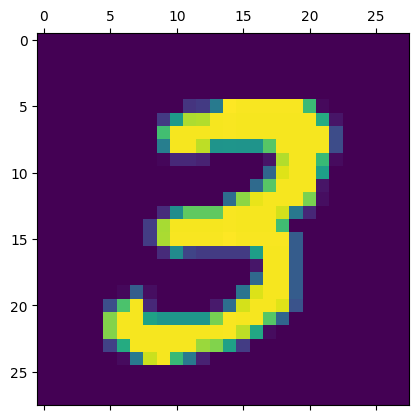

In [ ]:
plt.matshow(X_train[7])

In [ ]:
y_train[7]

3

In [ ]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
X_train = X_train/255      # Converting value of pixels between 0 to 1
X_test = X_test/255
X_train[5]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [ ]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_test_flattened.shape

(10000, 784)

In [ ]:
# sequential means stack of layers
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation="sigmoid")
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 9.3812 - accuracy: 0.8415
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 6.1840 - accuracy: 0.8773
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.6980 - accuracy: 0.8820
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.4878 - accuracy: 0.8862
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.4708 - accuracy: 0.8871


In [ ]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 6.0333 - accuracy: 0.8799


[6.033283233642578, 0.8798999786376953]

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predicted[2]

313/313 [==============================] - 0s 1ms/step


array([0.43469688, 0.5393535 , 0.5362742 , 0.46144262, 0.51658595,
       0.66845834, 0.4659047 , 0.57599247, 0.36390552, 0.4668849 ],
      dtype=float32)

In [ ]:
# It will find the maximum value and return us the index of that value
np.argmax(y_predicted[4])

5

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:3]

[5, 5, 5]

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

<Axes: >

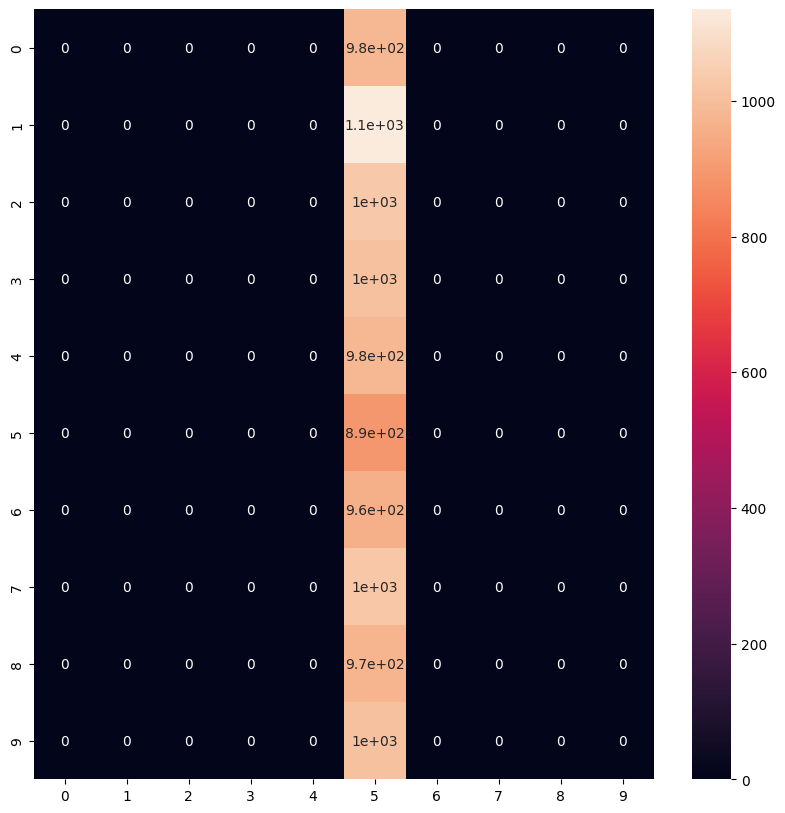

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm
import seaborn as sn
plt.figure(figsize=(10,10))
sn.heatmap(cm, annot=True)

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, input_shape=(784,), activation="relu"),
    keras.layers.Dense(10, activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3015 - accuracy: 0.1122
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3014 - accuracy: 0.1124
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3014 - accuracy: 0.1124
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3014 - accuracy: 0.1124
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3014 - accuracy: 0.1124


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.3012 - accuracy: 0.1135


[2.3011515140533447, 0.11349999904632568]

In [ ]:
# ********************** ACTIVATION FUNCTION *********************

In [ ]:
import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [ ]:
sigmoid(5)

0.9933071490757153

In [ ]:
sigmoid(-10)

4.5397868702434395e-05

In [ ]:
# tanh is an activation function that returns value in between -1 to 1

def tanh(x):
  return (math.exp(x) - math.exp(-x)) / (math.exp(x) + math.exp(-x))

In [ ]:
tanh(-56)

-1.0

In [ ]:
# relu is an activation function that returns the same value on getting a positive number or else 0

def relu(x):
  return max(0,x)

In [ ]:
relu(10)

10

In [ ]:
relu(-3)

0

In [ ]:
def leaky_relu(x):
  return max(0.1*x,x)

In [ ]:
leaky_relu(8)

8

In [ ]:
leaky_relu(-7)

-0.7000000000000001

In [ ]:
# ************************ MATRIX-CONCEPT **************************

In [ ]:
import numpy as np

revenue = np.array([[180,200,220], [24,36,40], [12,18,20]])
expenses = np.array([[80,90,100],[10,16,20],[8,10,10]])

In [ ]:
profit = revenue - expenses
profit

array([[100, 110, 120],
       [ 14,  20,  20],
       [  4,   8,  10]])

In [ ]:
np.dot(revenue, expenses)

array([[18160, 21600, 24200],
       [ 2600,  3136,  3520],
       [ 1300,  1568,  1760]])

In [ ]:
# *********************** LOSS AND COST FUNCTION ************************

In [ ]:
import numpy as np

y_predicted = np.array([1,1,0,0,1])
y_true = np.array([0.3,0.8,0.2,0.1,0.3])

In [ ]:
def mae(y_true, y_predicted):
  total_error = 0;
  for yt, yp in zip(y_true, y_predicted):
    total_error += abs(yp - yt)
    maerr = total_error / len(y_true)
    return maerr

In [ ]:
mae(y_true,y_predicted)

0.13999999999999999

In [ ]:
np.mean(np.abs(y_predicted - y_true))

0.38

In [ ]:
epsilon = 1e-15

In [ ]:
y_predicted_new = [max(i,epsilon) for i in y_predicted]
y_predicted_new

[1, 1, 1e-15, 1e-15, 1]

In [ ]:
y_predicted_new = np.array(y_predicted_new)
np.log(y_predicted_new)

array([  0.        ,   0.        , -34.53877639, -34.53877639,
         0.        ])

In [ ]:
y_predicted_neww = [min(i, 1-epsilon) for i in y_predicted_new]
y_predicted_neww

[0.999999999999999, 0.999999999999999, 1e-15, 1e-15, 0.999999999999999]

In [ ]:
y_predicted_new = np.array(y_predicted_neww)
np.log(y_predicted_new)

array([-9.99200722e-16, -9.99200722e-16, -3.45387764e+01, -3.45387764e+01,
       -9.99200722e-16])

In [ ]:
# BINARY CROSS ENTROPY / Log-Loss function

In [ ]:
-np.mean(y_true*np.log(y_predicted_new) + (1-y_true)*np.log(1 - y_predicted_new))

13.124990901243724

In [ ]:
# ************************* GRADIENT DESCENT ***********************

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/datasets/deep_learning1.csv")
df.head()

,age,affordibility,brought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[["age","affordibility"]], df.brought_insurance,test_size=0.2, random_state=25)
len(X_train)

21

In [ ]:
# scaling of age parameter so that to convert it between 0 to 1 range

X_train_scaled = X_train.copy()
X_train_scaled["age"] = X_train_scaled["age"] / 100

X_test_scaled = X_test.copy()
X_test_scaled["age"] = X_test_scaled["age"] / 100

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(2,), activation="sigmoid", kernel_initializer="ones", bias_initializer = "zeros")
])

model.compile(
    optimizer="adam",
    loss = "binary_crossentropy",
    metrics=["accuracy"]
)

model.fit(X_train_scaled, y_train, epochs=5000)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 10ms/step - loss: 0.4871 - accuracy: 0.7619
Epoch 2502/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.4870 - accuracy: 0.7619
Epoch 2503/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.4870 - accuracy: 0.7619
Epoch 2504/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.4870 - accuracy: 0.7619
Epoch 2505/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.4869 - accuracy: 0.7619
Epoch 2506/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.4869 - accuracy: 0.7619
Epoch 2507/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.4868 - accuracy: 0.7619
Epoch 2508/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.4868 - accuracy: 0.7619
Epoch 2509/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.4867 - accuracy: 0.7619
Epoch 2510/5000
1/1 [=============================

In [ ]:
model.evaluate(X_train_scaled, y_train)

1/1 [==============================] - 0s 265ms/step - loss: 0.4130 - accuracy: 0.9524


[0.4129813015460968, 0.9523809552192688]

In [ ]:
model.predict(X_test_scaled)

1/1 [==============================] - 0s 195ms/step


array([[0.76754946],
       [0.39608768],
       [0.15774845],
       [0.5338377 ],
       [0.7868423 ],
       [0.8781275 ]], dtype=float32)

In [ ]:
coef , intercept = model.get_weights()
coef, intercept

(array([[5.5735126],
        [1.6991647]], dtype=float32),
 array([-3.1241903], dtype=float32))

In [ ]:
def sigmoid(x):
  import math
  return 1 / (1 + math.exp(-x))

In [ ]:
def prediction_function(age, affordability):
  weighted_sum = coef[0]*age + coef[1]*affordability + intercept
  return sigmoid(weighted_sum)

In [ ]:
prediction_function(.47, 1)

0.7675494230112755

In [ ]:
def log_loss(y_true, y_predicted):
  epsilon = 1e-15
  y_predicted_new = [max(i,epsilon) for i in y_predicted]
  y_predicted_new = [min(i, 1-epsilon) for i in y_predicted_new]
  y_predicted_new = np.array(y_predicted_new)
  return -np.mean(y_true*np.log(y_predicted_new) + (1-y_true)*np.log(1 - y_predicted_new))

In [ ]:
def sigmoid_numpy(x):
  return 1 / (1+np.exp(-x))

sigmoid_numpy(np.array([12,0,1]))

array([0.99999386, 0.5       , 0.73105858])

In [ ]:
# creating gradient descent function from scratch without using tensorflow

In [ ]:
def gradient_descent(age,affordability, y_true, epochs, loss_threshold):
  # w1, w2, bias
  w1 = w2 = 1
  bias = 0
  rate = 0.01 # learning rate
  n = len(age)

  for i in range(epochs):
    weighted_sum = w1 * age + w2 * affordability + bias
    y_predicted = sigmoid_numpy(weighted_sum)

    loss = log_loss(y_true, y_predicted)

    w1d = (1/n)*np.dot(np.transpose(age), (y_predicted - y_true))
    w2d = (1/n)*np.dot(np.transpose(age), (y_predicted - y_true))

    bias_d = np.mean(y_predicted - y_true)

    # adjusting the value of weights after running epoches for achieving perfection
    w1 = w1 - rate * w1d
    w2 = w2 - rate * w2d
    bias = bias - rate * bias_d

    # for every epoch i'm printing my weight, bias and losses
    print(f'Epoch:{i}, w1:{w1}, bias:{bias}, loss:{loss}')

    if(loss <= loss_threshold):
      break

  return w1, w2, bias

In [ ]:
gradient_descent(X_train_scaled['age'], X_train_scaled['affordibility'], y_train, 1000, 0.4214)

Epoch:0, w1:0.9996520194776616, bias:-0.0019899472043885696, loss:0.6657455469538763
Epoch:1, w1:0.9993057370126908, bias:-0.003975549428983761, loss:0.6653137405618232
Epoch:2, w1:0.9989611500807881, bias:-0.005956813410462236, loss:0.6648839788210879
Epoch:3, w1:0.9986182561486013, bias:-0.007933745906173368, loss:0.6644562534468679
Epoch:4, w1:0.9982770526738176, bias:-0.009906353693906756, loss:0.6640305561677609
Epoch:5, w1:0.9979375371052557, bias:-0.01187464357166021, loss:0.6636068787259415
Epoch:6, w1:0.997599706882958, bias:-0.013838622357408235, loss:0.6631852128773394
Epoch:7, w1:0.9972635594382823, bias:-0.015798296888871022, loss:0.6627655503918126
Epoch:8, w1:0.9969290921939935, bias:-0.017753674023283948, loss:0.6623478830533189
Epoch:9, w1:0.9965963025643552, bias:-0.019704760637167595, loss:0.6619322026600881
Epoch:10, w1:0.9962651879552209, bias:-0.021651563626098318, loss:0.6615185010247877
Epoch:11, w1:0.9959357457641254, bias:-0.023594089904479348, loss:0.66110676

(1.09576116862204, 1.09576116862204, -0.8526188029107208)

In [ ]:
coef, intercept

(array([[5.5735126],
        [1.6991647]], dtype=float32),
 array([-3.1241903], dtype=float32))

In [ ]:
# Creating a deep nueral network using simple python code



IndentationError: ignored

In [ ]:
customModel = myNN()
customModel.fit(X_train_)

NameError: ignored

In [ ]:
# BATCH GRADIENT DESCENT

# Use all training sample for one forward pass and then adjust weight

# STOCHASTIC GRADIENT DESCENT

# Use one(randomly picked) sample for a forward pass and tgen adjust weights

# MINI-BATCH GRADIENT DESCENT

# Use a batch of randomly picked sampled for a forward pass and then adjust weight

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/datasets/homeprices_banglore (1).csv")
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [ ]:
df.shape

(20, 3)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

sx = MinMaxScaler()
sy = MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price', axis="columns"))
scaled_X
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [ ]:
np.ones(shape=(2))

array([1., 1.])

In [ ]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
  number_of_features = X.shape[1]

  w = np.ones(shape=(number_of_features))
  b = 0
  total_samples = X.shape[0]

  cost_list = []
  epoch_list = []

  for i in range(epochs):
    y_predicted = np.dot(w, scaled_X.T) + b # w1.area +w2.bedrooms

    w_grad = -(2/total_samples)*(X.T.dot(y_true - y_predicted))
    b_grad = -(2/total_samples)*np.sum(y_true - y_predicted)

    w = w - learning_rate*w_grad
    b = b - learning_rate*b_grad

    cost = np.mean(np.square(y_true - y_predicted))

    if i%10 == 0:
      cost_list.append(cost)
      epoch_list.append(i)

  return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)